# timeseries in pandas

In [1]:
# unzip file function
import zipfile
import os

def unzip_file(zip_file, dest_dir):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)

        

In [2]:
#unzip air_quality_data.zip
zip_file = 'air_quality_data.zip'
dest_dir = 'data'
unzip_file(zip_file, dest_dir)


In [3]:
# unzip stock_data.zip
zip_file = 'stock_data.zip'
dest_dir = 'data'
unzip_file(zip_file, dest_dir)


In [1]:

import pandas as pd

# create seven dates
seven_days = pd.date_range('2017-01-01', periods=7)

# iterate over seven dates and print date and day of week and dayname
for day in seven_days:
    print(day, day.dayofweek, day.day_name())

2017-01-01 00:00:00 6 Sunday
2017-01-02 00:00:00 0 Monday
2017-01-03 00:00:00 1 Tuesday
2017-01-04 00:00:00 2 Wednesday
2017-01-05 00:00:00 3 Thursday
2017-01-06 00:00:00 4 Friday
2017-01-07 00:00:00 5 Saturday


In [2]:
# import google.csv from /data/google.csv
google = pd.read_csv('data/google.csv')
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [7]:
#convert Date to datetime
google['Date'] = pd.to_datetime(google['Date'])

print(google.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB
None


In [8]:
# set index to Date
google.set_index('Date', inplace=True)
print(google.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB
None


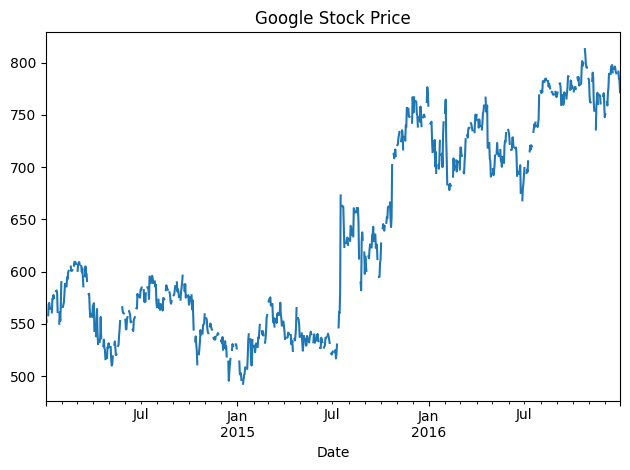

In [9]:
# plot the google closing price
import matplotlib.pyplot as plt
google.Close.plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

In [12]:
# pass string for part of date - year 2015
google.loc['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [13]:
# slice  - dates
google.loc['2015-01':'2016-02'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 425 entries, 2015-01-01 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   291 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [15]:
# select specific stock price
google.loc['2016-06-06', 'Close']

716.55

In [16]:
# setting frequency
google.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [17]:
# convert to business days
google.asfreq('B').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [18]:
# use isnull to check for missing values
google.isnull().sum()

Close    338
dtype: int64

In [19]:
# import nyc.csv
nyc = pd.read_csv('data/nyc.csv')

print(nyc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


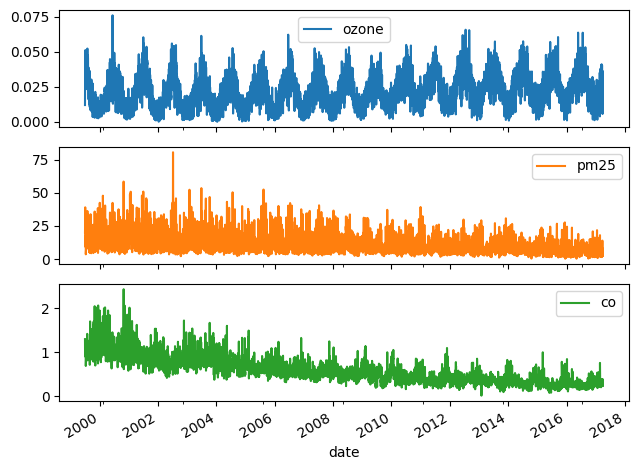

In [20]:
# convert date to datetime
nyc['date'] = pd.to_datetime(nyc['date'])

# set index to date
nyc.set_index('date', inplace=True)

print(nyc.info())

# plot the nyc with subplots=True
nyc.plot(subplots=True)
plt.tight_layout()
plt.show()



In [27]:
# import yahoo.csv
yahoo = pd.read_csv('data/yahoo.csv')

#set date to datetie and index
yahoo['date'] = pd.to_datetime(yahoo['date'])
yahoo.set_index('date', inplace=True)

print(yahoo.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB
None


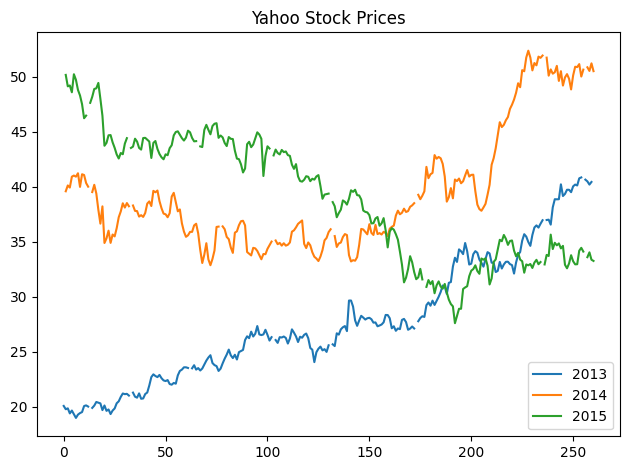

In [29]:
prices = pd.DataFrame()

years = [ '2013', '2014', '2015']

for year in years:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# plot prices
prices.plot(title='Yahoo Stock Prices')
plt.tight_layout()
plt.show()



In [30]:
# load co_cities.csv
co = pd.read_csv('data/co_cities.csv')
print(co.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1898 non-null   object 
 1   Chicago      1898 non-null   float64
 2   Los Angeles  1898 non-null   float64
 3   New York     1898 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.4+ KB
None


In [31]:
# set DatetimeIndex
co['date'] = pd.to_datetime(co['date'])
co.set_index('date', inplace=True)

print(co.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


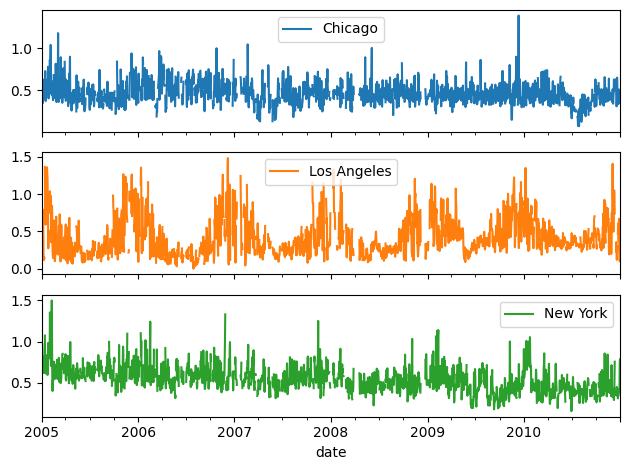

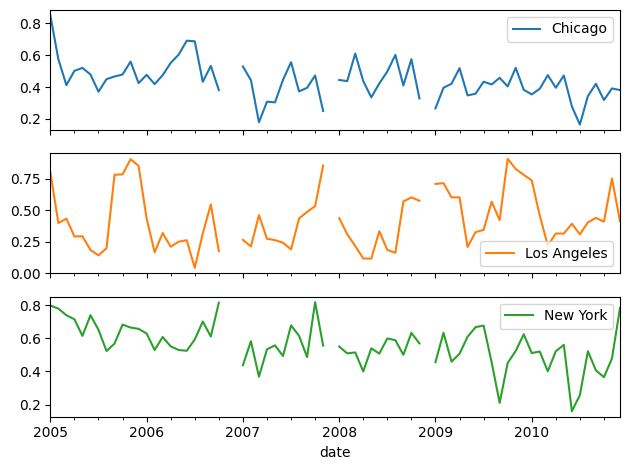

In [33]:
# set frequency to calendar daily
co = co.asfreq('D')

# plot
co.plot(subplots=True)
plt.tight_layout()
plt.show()

# monthly freq
co_monthly = co.asfreq('ME')

# plot
co_monthly.plot(subplots=True)
plt.tight_layout()
plt.show()


